A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [3]:
[col for col in df.columns if df[col].astype(str).str.contains('%').any()]

['Shooting Accuracy',
 '% Goals-to-shots',
 'Passing Accuracy',
 'Saves-to-shots ratio']

In [4]:
#Eliminar signo de porcentaje en columnas y convertirlas en numéricas.
cols = df.select_dtypes(include=['string', 'object']).columns
object_cols = [elem for elem in cols if  df[elem].str.contains('%').any()]

In [5]:
object_cols

['Shooting Accuracy',
 '% Goals-to-shots',
 'Passing Accuracy',
 'Saves-to-shots ratio']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [7]:
for elem in object_cols:
    df[elem]=df[elem].str.replace("%","")
    df[elem]=df[elem].astype(float)

In [8]:
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,10,62.6,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,20,74.1,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0,4.1,60,2,0,0,...,12,70.6,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,6,66.7,48,56,3,7,1,7,7,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     float64
 5   % Goals-to-shots            16 non-null     float64
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [10]:
corr_df = df.corr()


Buscar las columnas que tienen correlación con los Goles

In [11]:
corr_df

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.521210,0.533239,0.650109,0.200512,0.730437,0.023094,0.349330,...,0.143912,0.394424,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.504487,0.049623,0.886090,0.212932,0.478610,-0.229945,0.210571,...,0.085059,0.218915,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,-0.269946,-0.389095,0.887032,0.581655,0.126783,-0.173221,0.002284,...,0.086157,0.187128,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Shooting Accuracy,0.521210,0.504487,-0.269946,1.000000,0.548827,0.125994,-0.198917,0.234263,-0.223483,0.485392,...,0.179562,0.220664,0.235577,0.406282,0.382686,0.163668,-1.883518e-01,0.377589,0.377589,-0.022610
% Goals-to-shots,0.533239,0.049623,-0.389095,0.548827,1.000000,-0.195113,-0.087481,0.480954,0.370202,0.384424,...,0.121014,0.238564,0.034561,0.014626,0.255441,-0.071731,-1.669397e-01,0.130146,0.130146,-0.022179
Total shots (inc. Blocked),0.650109,0.886090,0.887032,0.125994,-0.195113,1.000000,0.400121,0.299397,-0.234668,0.125738,...,0.148269,0.252407,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,-0.198917,-0.087481,0.400121,1.000000,-0.076923,-0.041345,0.020174,...,-0.230524,-0.200695,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.234263,0.480954,0.299397,-0.076923,1.000000,0.537484,-0.020174,...,0.058761,0.135145,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.223483,0.370202,-0.234668,-0.041345,0.537484,1.000000,-0.357830,...,0.051019,-0.149787,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.485392,0.384424,0.125738,0.020174,-0.020174,-0.357830,1.000000,...,0.458773,0.578573,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214


In [12]:
#Columnas correlacionadas positiva o negativamente con Goals
cols_corr = corr_df[(corr_df["Goals"]>=0.5) | (corr_df["Goals"]< -0.5)].index.to_list()

In [13]:
cols_corr

['Goals',
 'Shots on target',
 'Shooting Accuracy',
 '% Goals-to-shots',
 'Total shots (inc. Blocked)',
 'Penalty goals',
 'Passes',
 'Passes completed',
 'Touches',
 'Crosses',
 'Dribbles',
 'Corners Taken',
 'Tackles',
 'Clean Sheets',
 'Fouls Won',
 'Offsides',
 'Subs on',
 'Subs off']

In [14]:
df[cols_corr]

,Goals,Shots on target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Penalty goals,Passes,Passes completed,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clean Sheets,Fouls Won,Offsides,Subs on,Subs off
0,4,13,51.9,16.0,32,0,1076,828,1706,60,42,14,49,0,41,2,9,9
1,4,13,41.9,12.9,39,0,1565,1223,2358,46,68,21,62,1,53,8,11,11
2,4,10,50.0,20.0,27,0,1298,1082,1873,43,32,16,40,1,25,8,7,7
3,5,11,50.0,17.2,40,0,1488,1200,2440,58,60,16,86,2,43,6,11,11
4,3,22,37.9,6.5,65,0,2066,1803,2909,55,76,28,71,1,36,5,11,11
5,10,32,47.8,15.6,80,1,2774,2427,3761,101,60,35,91,1,63,12,15,15
6,5,8,30.7,19.2,32,1,1187,911,2016,52,53,10,65,1,67,12,12,12
7,6,34,43.0,7.5,110,0,3016,2531,4363,75,75,30,98,2,101,16,18,18
8,2,12,25.0,4.1,60,0,1556,1381,2163,50,49,22,34,0,35,3,7,7
9,2,15,39.4,5.2,48,0,1059,852,1724,55,39,14,67,0,48,3,7,7


In [15]:
corr2_df = df[cols_corr].corr()

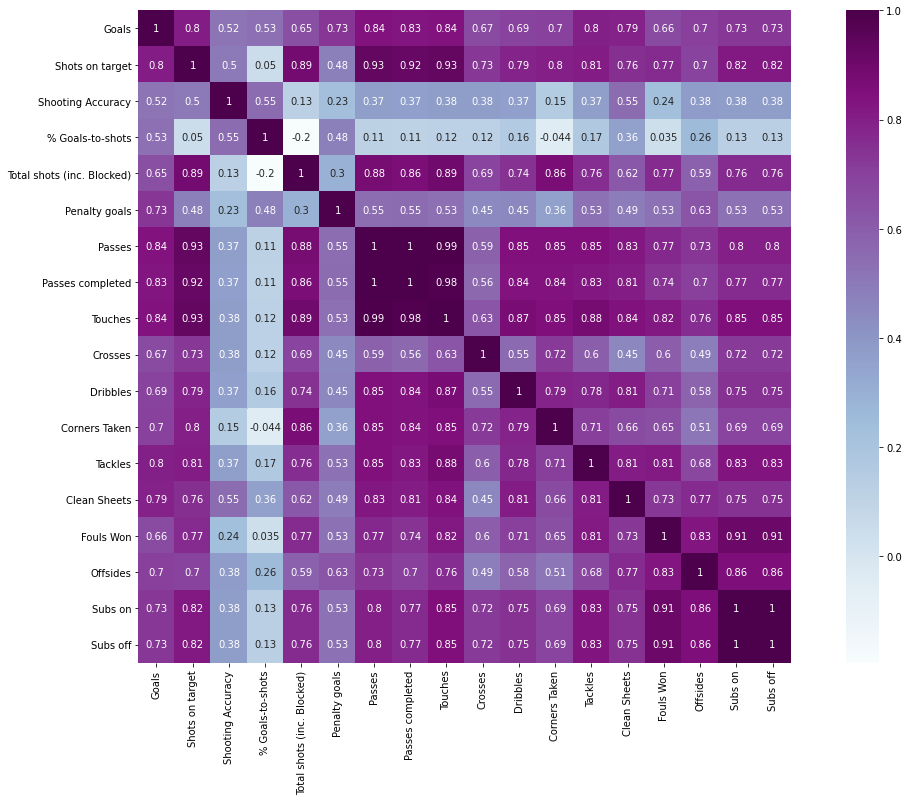

In [16]:
plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr2_df,   cmap= "BuPu", square=True,  annot=True)

In [17]:
#Las columnas con correlación más alta con Goals son:  
col_goals = corr_df[(corr_df["Goals"]>=0.75) | (corr_df["Goals"]< -0.75)].index.to_list()
col_goals

['Goals',
 'Shots on target',
 'Passes',
 'Passes completed',
 'Touches',
 'Tackles',
 'Clean Sheets']

In [18]:
goal_corr_df = df.loc[:,col_goals]

In [19]:
goal_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Goals             16 non-null     int64
 1   Shots on target   16 non-null     int64
 2   Passes            16 non-null     int64
 3   Passes completed  16 non-null     int64
 4   Touches           16 non-null     int64
 5   Tackles           16 non-null     int64
 6   Clean Sheets      16 non-null     int64
dtypes: int64(7)
memory usage: 1.0 KB


### Shooting Accuracy vs Goals
2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

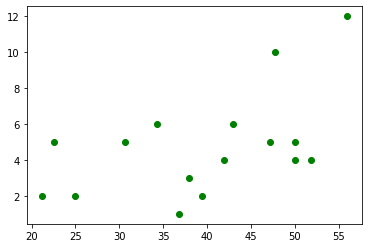

In [20]:
plt.scatter(df["Shooting Accuracy"],df['Goals'], color='g')

In [21]:
df.sort_values("Goals", inplace=True)

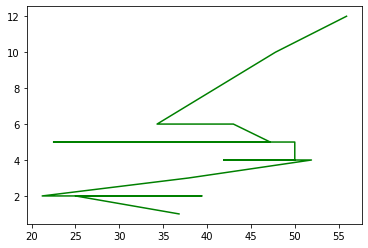

In [22]:
plt.plot(df["Shooting Accuracy"],df['Goals'], color='g')

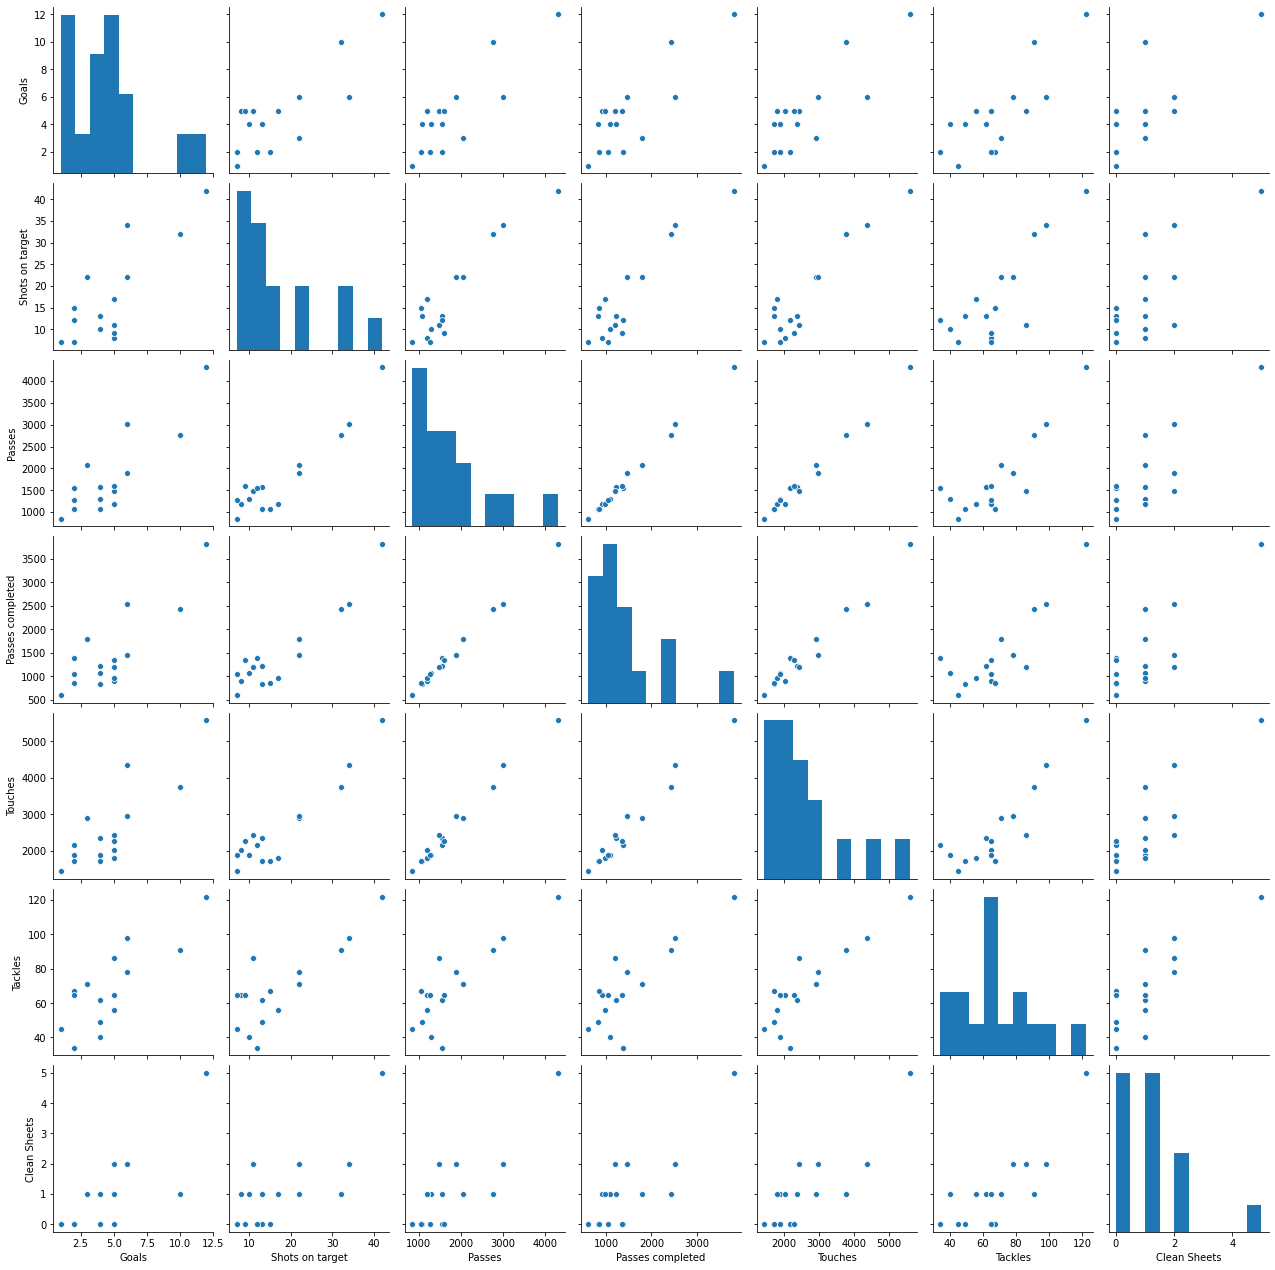

In [23]:
sns.pairplot(goal_corr_df)

In [24]:
Xcols=cols_corr

In [25]:
Xcols.remove('Goals')

In [26]:
Xcols

['Shots on target',
 'Shooting Accuracy',
 '% Goals-to-shots',
 'Total shots (inc. Blocked)',
 'Penalty goals',
 'Passes',
 'Passes completed',
 'Touches',
 'Crosses',
 'Dribbles',
 'Corners Taken',
 'Tackles',
 'Clean Sheets',
 'Fouls Won',
 'Offsides',
 'Subs on',
 'Subs off']

In [27]:
# Columns as Features
X = df[Xcols]

In [28]:
X.shape

(16, 17)

In [29]:
y = df["Goals"]

In [30]:
y.shape

(16,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Regresion lineal

In [32]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [33]:
#creating LinearRegression Object
model = LinearRegression()  # -1 to use all processors

In [34]:
#Training the Data Model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Shots on target,0.045883
Shooting Accuracy,-0.058508
% Goals-to-shots,0.217191
Total shots (inc. Blocked),0.030835
Penalty goals,0.019852
Passes,0.039861
Passes completed,-0.019538
Touches,-0.018186
Crosses,0.092515
Dribbles,0.005556


** Coeficientes ** :
Dejando fijas las otras variables, una unidad de incremento en % Goals-to-shots está asociada con un aumento de  0.2401 Goles .

In [36]:
X_train.shape

(12, 17)

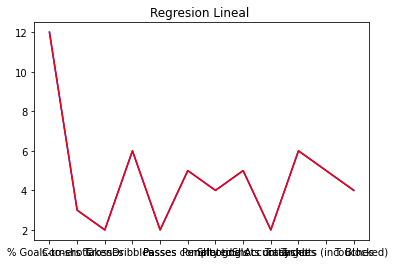

In [37]:
# Ver el modelo con el conjunto de entrenamiento
y_pred = model.predict(X_train)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.plot(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.title("Regresion Lineal ")
plt.show()


In [38]:
# Score con el conjunto de test
predictions = model.predict(X_test)
predictions

array([ 2.65412101, 11.26662273,  5.14413475,  3.07587935])

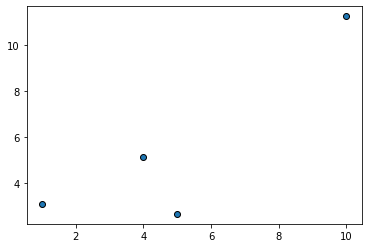

In [39]:
plt.scatter(y_test, predictions, edgecolor='black')

In [40]:
print("Accuracy", model.score(X_test,y_test)*100, "%")

Accuracy 69.700474379579 %


## Regresion No lineal con polinomio

In [41]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [42]:
polinominal_model = PolynomialFeatures(2) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)


X_test_poly = polinominal_model.fit_transform(X_test, y_test) # ** CON TEST **
ytest_pred = lin_reg_model.predict(X_test_poly)  # ** CON TEST **



In [43]:
        print("Score train:", r2_score(y_train, y_pred)*100, "% - ", "Score_test:", r2_score(y_test, ytest_pred)*100, "%")
        print("--------------")

Score train: 100.0 % -  Score_test: 47.42556862190634 %
--------------


## SVR

In [44]:
from sklearn.svm import SVR

In [45]:
# #############################################################################
# Fit regression model variando kernel (rbf,linear,poly) "SVR"
# USANDO TODAS LAS VARIABLES INDEPENDIENTES A LA VEZ
svr_rbf = SVR(kernel='rbf', C=1000, gamma=10, epsilon=.1)


model = svr_rbf.fit(X_train,y_train)
print ("Score Train:",model.score(X_train,y_train)*100,"%")
print ("Score Test:",model.score(X_test,y_test)*100,"%")

Score Train: 99.85521476499495 %
Score Test: -1.058201058201047 %


In [46]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

model = svr_lin.fit(X_train,y_train)
print ("Score Train:",model.score(X_train,y_train)*100,"%")
print ("Score Test:",model.score(X_test,y_test)*100,"%")

Score Train: 99.83512512693325 %
Score Test: 75.9373607437612 %


In [47]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
model = svr_poly.fit(X_train,y_train)
print ("Score Train:",model.score(X_train,y_train)*100,"%")
print ("Score Test:",model.score(X_test,y_test)*100,"%")

Score Train: 99.84621735023008 %
Score Test: 16.64453480031748 %



3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [48]:
X2 = X.loc[:,['% Goals-to-shots','Total shots (inc. Blocked)','Corners Taken','Passes','Dribbles']]

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.20)

In [50]:
# Valor a predecir
val_pred=np.array([[0.4,102,5,82,23]])

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X2_train, y_train)
y_pred = model.predict (val_pred)
print ("Según:", model, " el equipo marcaría: ", y_pred[0], "goles")

Según: LogisticRegression()  el equipo marcaría:  5 goles


### SVM

In [53]:
from sklearn.svm import SVC
model = SVC(kernel= "rbf", C=1000)
model.fit(X2_train, y_train)
y_pred = model.predict(val_pred)
print ("Según:", model, " el equipo marcaría: ", y_pred[0], "goles")

Según: SVC(C=1000)  el equipo marcaría:  12 goles


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X2_train, y_train)
y_pred = model.predict(val_pred)
print ("Según:", model, " el equipo marcaría: ", y_pred[0], "goles")

Según: RandomForestClassifier()  el equipo marcaría:  12 goles
